In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashviiii
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance


100%|██████████| 16.0k/16.0k [00:00<00:00, 27.4MB/s]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
medical_df= pd.read_csv("/content/insurance/insurance.csv")

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:

medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
medical_df.shape

(1338, 7)

In [9]:
medical_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Text(0.5, 1.0, 'distribution of age')

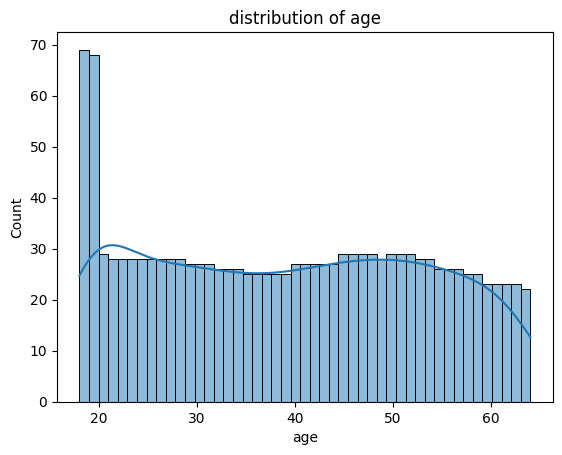

In [10]:
sns.histplot(medical_df['age'], bins=47, kde=True)
plt.title("distribution of age")




Text(0.5, 1.0, 'distribution of bmi')

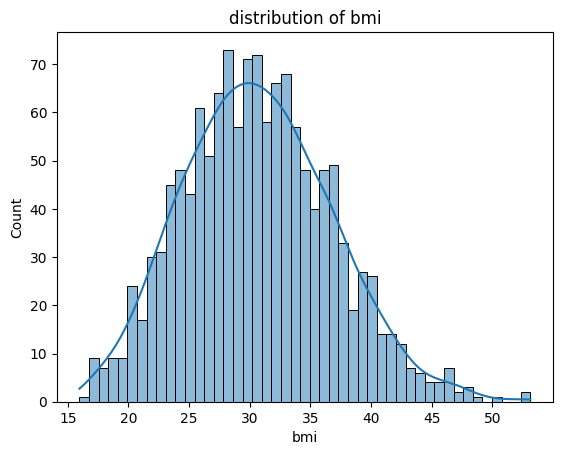

In [11]:
sns.histplot(medical_df['bmi'], bins=47, kde=True)
plt.title("distribution of bmi")

Text(0.5, 1.0, 'Types of smoker')

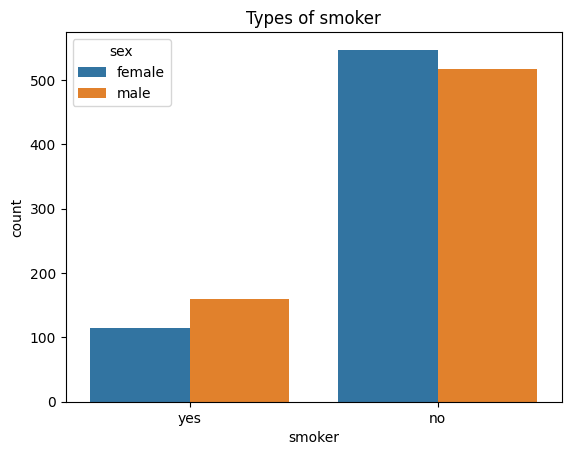

In [12]:

sns.countplot(x= 'smoker',hue='sex' , data= medical_df)
plt.title("Types of smoker")

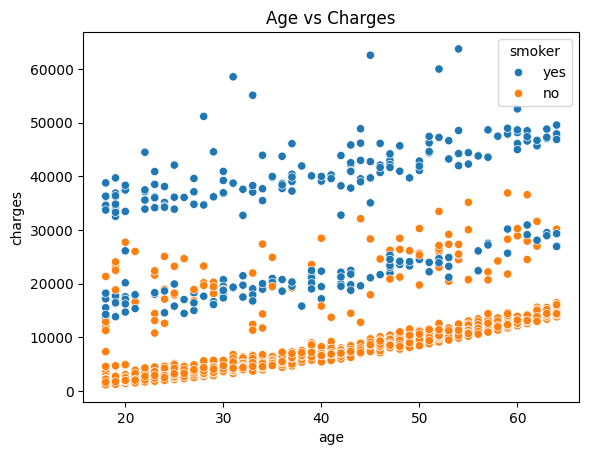

In [13]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=medical_df)
plt.title('Age vs Charges')
plt.show()

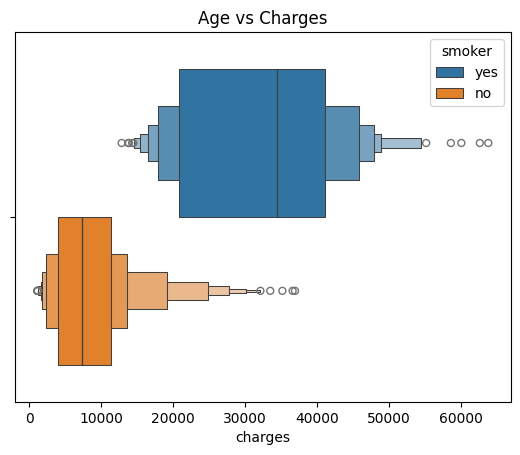

In [14]:
sns.boxenplot(x='charges', hue='smoker', data=medical_df)
plt.title('Age vs Charges')
plt.show()

<Axes: xlabel='children', ylabel='charges'>

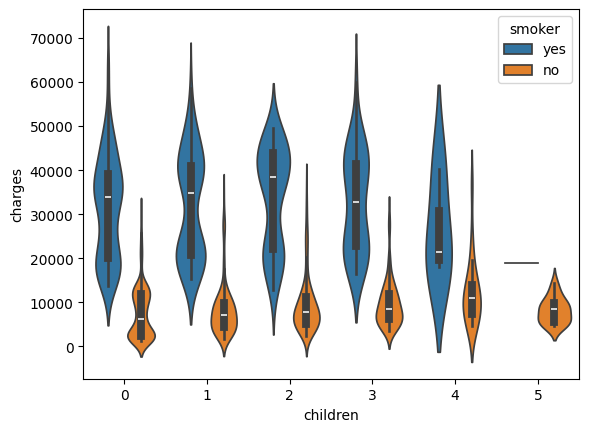

In [15]:
sns.violinplot(x='children', y='charges',  hue='smoker', data=medical_df)

<Axes: xlabel='children', ylabel='charges'>

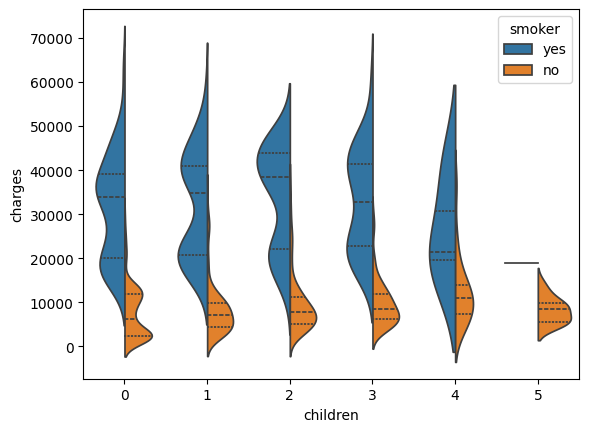

In [16]:
sns.violinplot(x='children', y='charges', hue='smoker', data=medical_df, split=True, inner='quartile')


CORRELATION


In [17]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [18]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [19]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

Converting Categorical-> Numeric data


In [20]:
smoker_val= {'no':0, 'yes':1}
smoker_num= medical_df.smoker.map(smoker_val)
smoker_num

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [21]:
medical_df.charges.corr(smoker_num)

np.float64(0.787251430498478)

In [22]:
medical_df_encoded = pd.get_dummies(medical_df, columns=['sex', 'smoker', 'region'], drop_first=True)
medical_df_encoded.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


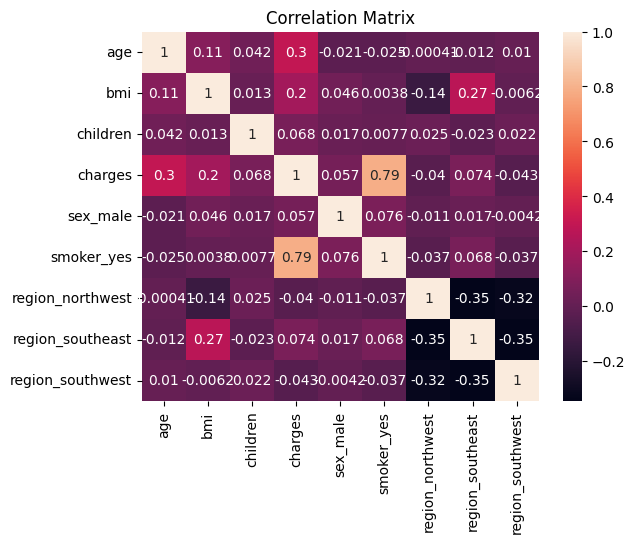

In [23]:
sns.heatmap(medical_df_encoded.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [24]:
non_smoker_df=medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

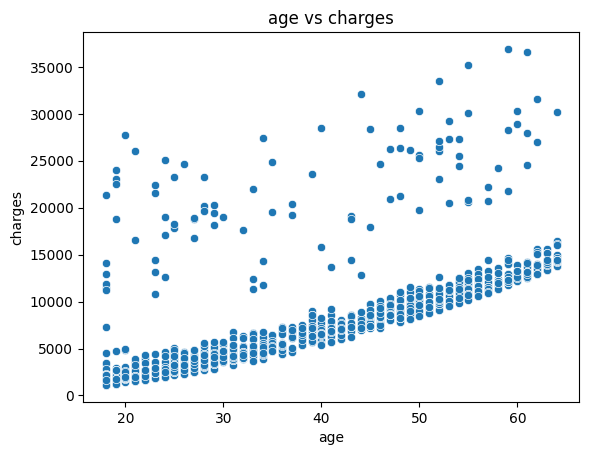

In [25]:
plt.title('age vs charges')
sns.scatterplot(x='age', y='charges', data=non_smoker_df)

y= mx+c

m=slope, c= interncept
charges= w*age+b


w-weight b-bias


vlaues in the charges col -target and age - feature





MODEL

In [26]:
def estimate_charges(age, w, b):
  return w * age + b

w= 50
b= 100
estimate_charges(30 , w, b)

1600

In [27]:
ages= non_smoker_df.age
ages.describe()


,age
count,1064.000000
mean,39.385338
std,14.083410
min,18.000000
25%,26.750000
50%,40.000000
75%,52.000000
max,64.000000


In [28]:
estimated_charge= estimate_charges(ages, w, b)
estimated_charge

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [29]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


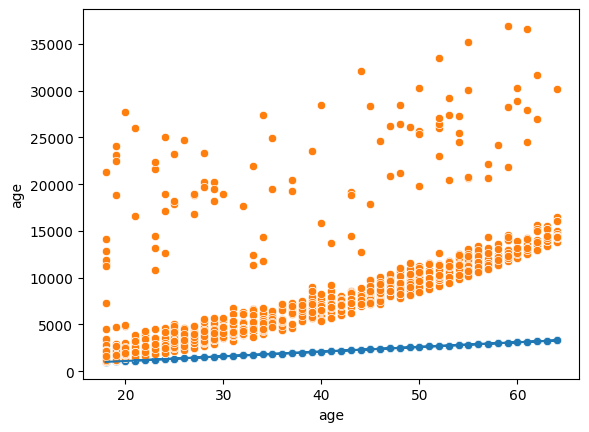

In [30]:
sns.scatterplot(x=ages, y=estimate_charges(ages, w, b))
sns.scatterplot(x=ages, y=non_smoker_df.charges)
plt.plot(ages, estimated_charge)

In [31]:
target= non_smoker_df.charges
target

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [32]:
predictions= estimated_charge
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [33]:
def rmse(target, predictions):
  return np.sqrt(np.mean(np.square(target-predictions)))

In [34]:
loss=rmse(target, predictions)
loss

np.float64(8461.949562575493)

Linerar regression using Scikit-learn

In [35]:
!pip install scikit-learn --quiet

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model= LinearRegression()

In [38]:
help(model.fit)
# model.fit requires 2d not a sine so if u just give [age ]
# incoorect - u need to give [[]]-> 2d array


Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [39]:
inputs = non_smoker_df[['age']]
target = non_smoker_df.charges
print(inputs.shape)
print(target.shape)

(1064, 1)
(1064,)


In [40]:
model.fit(inputs, target )

LinearRegression()

In [41]:
model.predict(np.array([[23], [37], [61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [42]:
predictions= model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [43]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [44]:
target

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [45]:
rmse(target, predictions)

np.float64(4662.505766636395)

model is off by 4000 on avg

In [46]:
model.coef_

array([267.24891283])

In [47]:
model.intercept_

np.float64(-2091.4205565650864)

In [48]:
from sklearn.linear_model import SGDRegressor

In [49]:
model= SGDRegressor()

In [50]:
model.fit(inputs, target)

SGDRegressor()

In [51]:
model.predict(np.array([[23], [37], [61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([ 2503.44052142,  6366.63392428, 12989.25118631])

In [52]:
prediction2= model.predict(inputs)
prediction2

array([1123.72859183, 3883.15245101, 5262.8643806 , ..., 1123.72859183,
       1123.72859183, 1951.55574959])

In [53]:
rmse(target, prediction2)

np.float64(4872.41174759251)

In [54]:
smoker_df= medical_df[medical_df.smoker == 'yes']

In [90]:
smoker_df.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [91]:
smoker_df.select_dtypes(include=np.number).corr()

,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


<Axes: title={'center': 'Smoker graph'}, xlabel='age', ylabel='charges'>

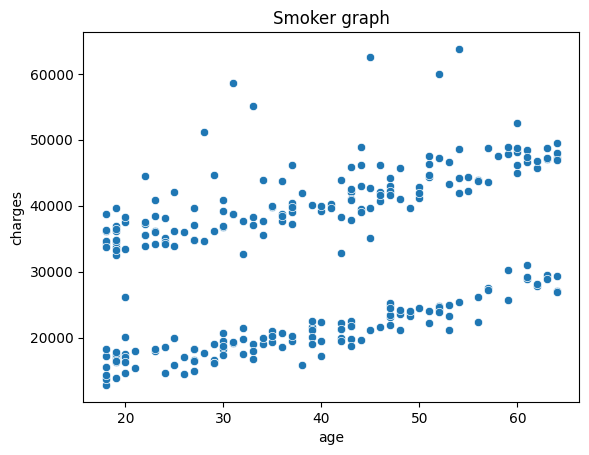

In [92]:
plt.title("Smoker graph")
sns.scatterplot(x='age', y='charges', data=smoker_df)

<Axes: xlabel='age', ylabel='charges'>

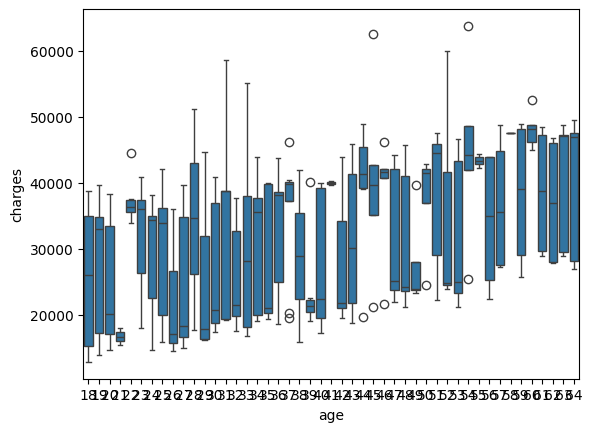

In [93]:
sns.boxplot(x='age', y='charges', data=smoker_df)

In [59]:
target=smoker_df.charges

In [60]:
inp= smoker_df[['age']]
target= smoker_df.charges

In [61]:
model= LinearRegression()

In [62]:
model.fit(inp, target)

LinearRegression()

In [63]:
model.predict(np.array([[23], [37], [61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27314.59297544, 31587.91940498, 38913.62185562])

In [64]:
prediction3= model.predict(inp)
prediction3

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [65]:
target

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


In [66]:
rmse(target, prediction3)

np.float64(10711.00334810241)

<Axes: xlabel='smoker', ylabel='charges'>

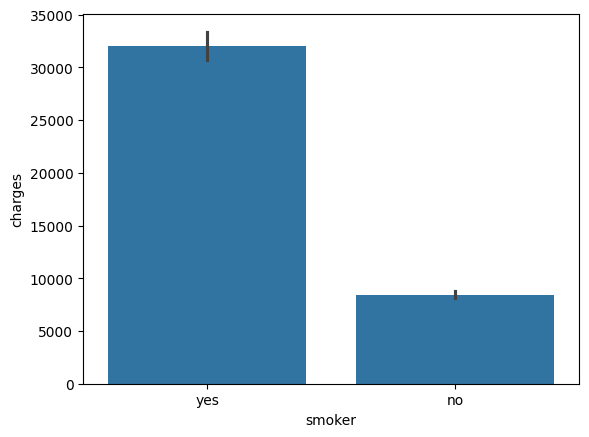

In [67]:

sns.barplot(data= medical_df, x= 'smoker', y= 'charges')

avg is nearby - 32k

In [70]:
smoker_code={'no':0, 'yes':1}
smoker_code =medical_df.smoker.map(smoker_code)

In [72]:
medical_df.charges.corr(smoker_code)

np.float64(0.787251430498478)

In [74]:
medical_df['smoker_code'] = smoker_code
# creating inputs and targets
inputs , target = medical_df[['age', 'bmi','children', 'smoker_code']], medical_df.charges

# creating and training
model= LinearRegression()
model.fit(inputs, target)
print(model)

# generate prediction
predictions4= model.predict(inputs)
print(predictions4)
# computing loss
loss= rmse(target, predictions4)
print('Loss', loss)

LinearRegression()
[25587.42524891  3880.94594512  7158.62006921 ...  4398.7459491
  1615.83647369 36793.67069541]
Loss 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

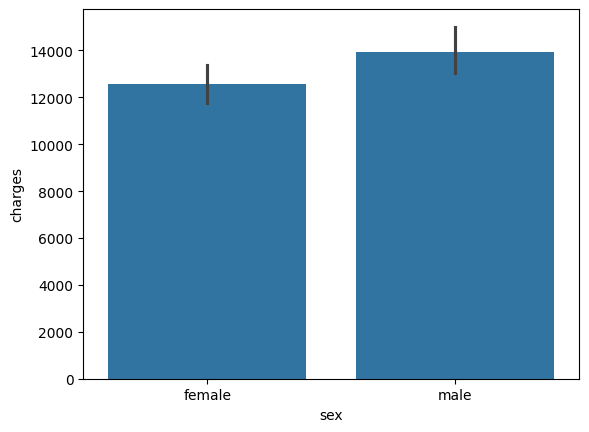

In [75]:
sns.barplot(data= medical_df, x= 'sex', y= 'charges')

In [79]:
sex_code= {'male':1, 'female':0}
medical_df['sex_code'] =medical_df.sex.map(sex_code)

In [80]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

hardly any change in the loss so we can even ignore it


one hot encoding


<Axes: xlabel='region', ylabel='charges'>

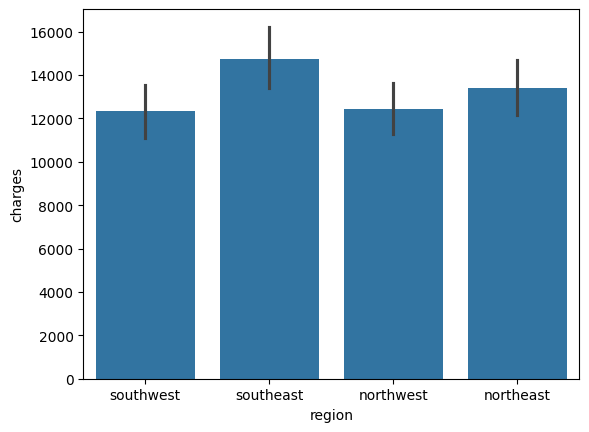

In [81]:
sns.barplot(data= medical_df, x= 'region', y= 'charges')

In [84]:
from sklearn import preprocessing
enc= preprocessing.OneHotEncoder()
enc_data= pd.DataFrame(enc.fit_transform(medical_df[['region']]).toarray())
enc_data.columns = enc.get_feature_names_out(['region'])
medical_df = pd.concat([medical_df, enc_data], axis=1)